In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.metrics import r2_score

In [7]:
df=pd.read_csv('1000_Companies.csv')

In [8]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
df.shape

(1000, 5)

In [10]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
R&D Spend          1000 non-null float64
Administration     1000 non-null float64
Marketing Spend    1000 non-null float64
State              1000 non-null object
Profit             1000 non-null float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [12]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [13]:
s=df['R&D Spend']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [14]:
len(outliers)

0

In [15]:
s=df['Administration']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [16]:
len(outliers1)

22

In [17]:
a=list(outliers1.keys())
df.drop(a,inplace=True)

In [18]:
s=df['Marketing Spend']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers2=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [19]:
len(outliers2)

0

In [20]:
df['State'].value_counts()

California    335
New York      325
Florida       318
Name: State, dtype: int64

In [21]:
le=LabelEncoder()

In [22]:
df['State']=le.fit_transform(df['State'])

In [23]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51


In [24]:
X=df.drop('Profit',axis=1)
Y=df['Profit']

In [25]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0


In [26]:
Y.head()

0    192261.83
2    191050.39
3    182901.99
5    156991.12
6    156122.51
Name: Profit, dtype: float64

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [28]:
ss=StandardScaler()

In [29]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [30]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(2,activation="relu",input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(3,activation="relu"),
    tf.keras.layers.Dense(1)
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='sgd',loss='mse')

In [33]:
trained_model=model.fit(X_train_ss,Y_train,epochs=50,batch_size=20)

Epoch 1/50
35/35 [==============================] - 0s 4ms/step - loss: 36593781068896665600.0000
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 7583727370633216.0000
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 1843766914711552.0000
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 448268689473536.0000
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 108975693496320.0000
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 26496997523456.0000
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 6444875251712.0000
Epoch 8/50
35/35 [==============================] - 0s 3ms/step - loss: 1567767920640.0000
Epoch 9/50
35/35 [==============================] - 0s 3ms/step - loss: 382678106112.0000
Epoch 10/50
35/35 [==============================] - 0s 3ms/step - loss: 94196727808.0000
Epoch 11/50
35/35 [==============================] - 0s 3ms/step - loss: 2

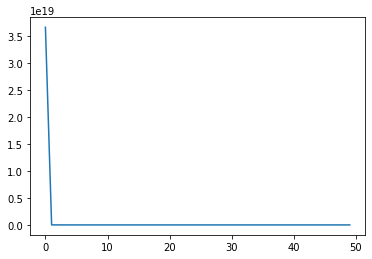

In [34]:
plt.plot(trained_model.history['loss'])

In [35]:
Y_pred=model.predict(X_test_ss)

In [36]:
print(r2_score(Y_test,Y_pred))

-0.005897704430070538
